In [13]:
# Searching a motif within the mic channel of a .kwd file
# the i-th motiff is in the file pattern_i.wav
# the raw data comes in file experiment.raw.kwd

# Definitions and functions

%matplotlib inline
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os
import wave
import struct
import h5py
from scipy.io import wavfile
from scipy.signal import spectrogram
import logging
from IPython.display import display
matplotlib.style.use('ggplot')
from ipywidgets import *
import yaml
from scipy.io import wavfile
from scipy.signal import resample
from __future__ import division
# Check wich computer to decide where the things are mounted
comp_name=socket.gethostname()
print 'Computer: ' + comp_name

if 'txori' in comp_name or 'passaro' in comp_name or 'lintu' in comp_name:
    repos_folder = os.path.abspath('/mnt/cube/earneodo/repos')
    experiment_folder = os.path.join('/mnt/cube/earneodo/bci_zf/')

sys.path.append(os.path.join(repos_folder, 'soundflow', 'sound_tools'))
sys.path.append(os.path.join(repos_folder, 'ephysflow'))
sys.path.append(os.path.join(repos_folder, 'analysis-tools'))

#setup the data folder
ss_data_folder = os.path.join(experiment_folder, 'ss_data')

import soundtools as st
import Kwik as oe
from file_tools import experiment as et

Computer: passaro


In [6]:
fold = os.path.join('/mnt/cube/earneodo', 'bci_zf', 'stim_data', 'z014','set_001')
f_list = os.listdir(fold)
print f_list

['bos.wav', 'synth', 'bos_rev.wav', 'bos_synth.wav']


In [7]:
for bout_file in f_list:
    if bout_file.endswith('.wav') and not bout_file.startswith('._'):
        in_file = os.path.join(fold, bout_file)
        print in_file
        out_file = os.path.join(fold,'40000', bout_file)
        print out_file
        wav.resample_wav(in_file, 30000, out_file = out_file)

/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/bos.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/40000/bos.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/40000/bos.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/bos_rev.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/40000/bos_rev.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/40000/bos_rev.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/bos_synth.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/40000/bos_synth.wav
/mnt/cube/earneodo/bci_zf/stim_data/z014/set_001/40000/bos_synth.wav


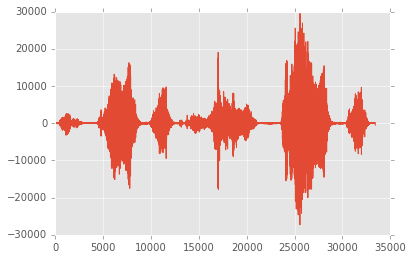

In [12]:
plt.plot(data)

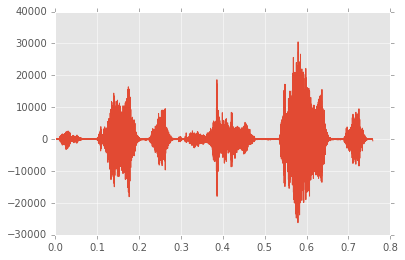

In [28]:
plt.plot(t, song_out)

In [17]:
resample(data, new_len)

array([-311.31503766, -252.30200839, -244.3475887 , ..., -465.65404791,
       -453.7963431 , -522.4968545 ])

In [51]:
def make_stereo_stim(wave_in, tag_freq, out_sf):
    in_sf, data = wavfile.read(wave_in)
    new_len = int(round(data.shape[0] * out_sf / in_sf))
    song_out = np.round(resample(data, new_len)).astype(np.int16)
    tag_out = np.round(np.sin(2*np.pi*tag_freq*np.arange(new_len)/out_sf)*30000).astype(np.int16)
    
    return np.column_stack([song_out, tag_out])


wave_in = os.path.join(os.path.abspath('/mnt/cube/earneodo/bci_zf/stim_data/z007/001'), 'bos_syn.wav')
wave_out = os.path.join(os.path.abspath('/mnt/cube/earneodo/bci_zf/stim_data/z007/001'), 'bos_syn_tag.wav')

tag_f = 3000
out_sf = 30000
song_out = make_stereo_stim(wave_in, tag_f, out_sf)
wavfile.write(wave_out, out_sf, song_out)

In [27]:
out_sf = 30000
t = np.arange(new_len)/out_sf

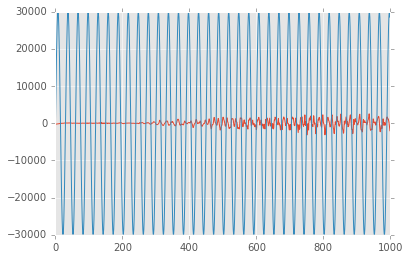

In [41]:
plt.plot(song_out.T[:1000])

In [47]:
song_out.shape

(22750, 2)